In [5]:
%load ImportsDefinitions.py


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dtchmnt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dtchmnt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\dtchmnt\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dtchmnt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\dtchmnt\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dtchmnt\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexi

In [6]:
#case #1: pairnoume to dataset me 50000 stixous to opoio den periexei synaishtimatiko skor
path='songdata.csv'
data = pd.read_csv(path)
all_texts=data.text
text_samples1=data.text
print("Τα NULL δεδομένα στο dataset μας είναι: {}".format(text_samples1.isnull().sum()))
#text_samples=text_samples1.sample(200,random_state=1) # pairnoume ena tyxaio deigma apo ta sample mas
text_samples=text_samples1 

print("Έχουμε {} διαφορετικά τραγούδια".format(text_samples.count()))
print(text_samples.head(10))

Τα NULL δεδομένα στο dataset μας είναι: 0
Έχουμε 57650 διαφορετικά τραγούδια
0    Look at her face, it's a wonderful face  \nAnd...
1    Take it easy with me, please  \nTouch me gentl...
2    I'll never know why I had to go  \nWhy I had t...
3    Making somebody happy is a question of give an...
4    Making somebody happy is a question of give an...
5    Well, you hoot and you holler and you make me ...
6    Down in the street they're all singing and sho...
7    Chiquitita, tell me what's wrong  \nYou're enc...
8    I was out with the morning sun  \nCouldn't sle...
9    I'm waitin' for you baby  \nI'm sitting all al...
Name: text, dtype: object


Έχουμε 40128 χαρούμενα τραγούδια
Έχουμε 17522 στενάχωρα τραγούδια


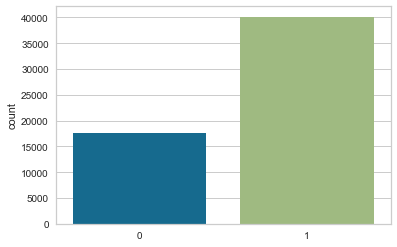

In [7]:
#sentiment analysis with vader

vader_class_sentiments=SentimentAnalysis_Vader(text_samples)
sns.countplot(vader_class_sentiments,label="Count")
plt.show()



In [8]:
#σώζουμε τη λίστα με την συναισθηματική ανάλυση Vader. Με την αποκάτω γραμμή, μπορούμε να την φορτώσουμε, 
#σε περίπτωση που θέλουμε να γλιτώσουμε υπολογιστικο χρόνο και να δοκιμάσουμε διαφορετικά πράγματα στο σετ δεδομένων μας
saveList(vader_class_sentiments,"vader_class_sentiments.npy")
#vader_class_sentiments=loadList("vader_class_sentiments.npy")

Saved successfully!


In [9]:
#χωρίζουμε τα σετ εκπαιδευσης και ελεγχου, ωστε να μπορούμε να αξιολογησουμε καθε μοντελο με διαφορετικα τεστ sets
X_train_v, X_test_v, y_train_v, y_test_v = train_test_split(text_samples, vader_class_sentiments,test_size=0.2,random_state=2)


Παρουσιάζουμε την επιτυχία των vectorizers για τη συναισθηματική κλάση από vader ΧΩΡΙΣ tokenizer:
Number of features: 73974
to accuracy tou CountVectorizer me NB einai: 0.7742628990509957


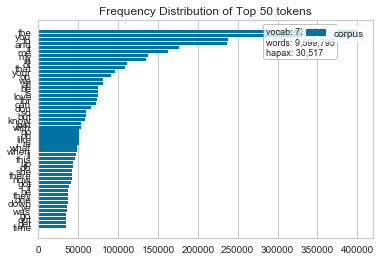

Number of features: 73974
to accuracy tou TFIDF me NB einai 0.7039896589523721


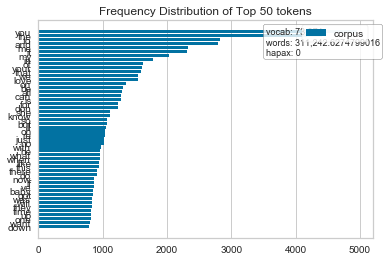

Παρουσιάζουμε την επιτυχία των vectorizers για τη συναισθηματική κλάση από vader ΜΕ tokenizer
Number of features: 72777
to accuracy tou CountVectorizer me NB einai: 0.780767680524436


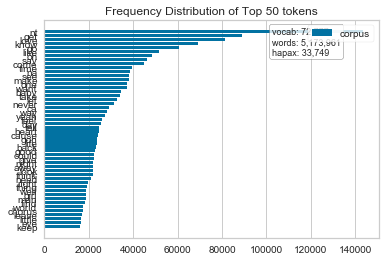

Number of features: 72777
to accuracy tou TFIDF me NB einai 0.7076540034243628


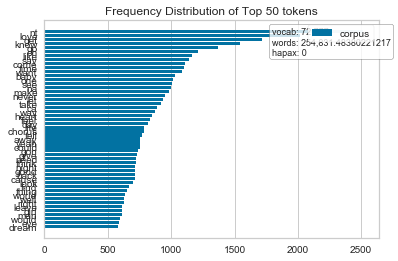

In [10]:
#αξιολόγηση CountVect kai TFIDF gia synaisthimatikh analysh me VADER
#Αξιολόγηση Vectorizers 
#θα καλέσουμε ένα απλό naive bayes μοντέλο με default χαρακτηριστικά, για κάθε vectorizer 
#χωρίς παραμετροποίηση ώστε να δούμε ποιο μοντέλο θα παραμετροποιήσουμε
token_iser='0'
scores=[]
print("Παρουσιάζουμε την επιτυχία των vectorizers για τη συναισθηματική κλάση από vader ΧΩΡΙΣ tokenizer:")
scores.append(countvect_test_simple(X_train_v,X_test_v,y_train_v,y_test_v,token_iser))

scores.append(tfidf_test_simple(X_train_v,X_test_v,y_train_v,y_test_v,token_iser))

    
token_iser='1'

print("Παρουσιάζουμε την επιτυχία των vectorizers για τη συναισθηματική κλάση από vader ΜΕ tokenizer")
scores.append(countvect_test_simple(X_train_v,X_test_v,y_train_v,y_test_v,token_iser))
scores.append(tfidf_test_simple(X_train_v,X_test_v,y_train_v,y_test_v,token_iser))

#κραταμε CV me tokenizer

In [11]:
# DataFrame Vectorizer Accuracy 
acc_df = pd.DataFrame()
acc_df['params']= ['cvec without tokenizer','tvec without tokenizer','cvec with tokenizer','tvect with tokenizer']
acc_df['scores']= scores
acc_df

,params,scores
0,cvec without tokenizer,0.774263
1,tvec without tokenizer,0.703990
2,cvec with tokenizer,0.780768
3,tvect with tokenizer,0.707654


In [12]:
#optimization vectorizor, opoiou einai kalyteros
ngrams=[1,2,3,4]
mdf_params = [0.25, 0.5, 0.75, 1.0]
maxfeat=[None,5000,20000,50000,100000]

#θα υλοποιησουμε διαφορετικους count vectorizers με logreg για να βρουμε την καλυτερη επιδοση
#θα ορισουμε τις λιστες στις οποιες θα αποθηκευσουμε τα αποτελεσματα
ngram_scores=[]
mdf_scores=[]
maxfeat_scores=[]


token_izer='1'

for mdf in mdf_params:
    mdf_scores.append(countvect_test_maxdf(X_train_v,X_test_v,y_train_v,y_test_v,token_izer,mdf))
print("Τα ποσοστα επιτυχιας του LR για το VADER με διαφορετικά max DF ειναι: {}".format(mdf_scores))
for n in ngrams:
    ngram_scores.append(countvect_test_ngrams(X_train_v,X_test_v,y_train_v,y_test_v,token_izer,n))
print("Τα ποσοστα επιτυχιας του LR για το VADER με διαφορετικά n-grams ειναι: {}".format(ngram_scores))

for mf in maxfeat:
    maxfeat_scores.append(countvect_test_maxfeat(X_train_v,X_test_v,y_train_v,y_test_v,token_izer,mf))
print("Τα ποσοστα επιτυχιας του LR για το SentiWordNet με διαφορετικά max Features ειναι: {}".format(maxfeat_scores))


Number of features: 72755
To accuracy NB me Max df: 0.25 είναι : [0.7727864  0.77484822 0.77510841 0.77448174] 
Number of features: 72775
To accuracy NB me Max df: 0.5 είναι : [0.77651548 0.78074588 0.78187337 0.78194119] 
Number of features: 72777
To accuracy NB me Max df: 0.75 είναι : [0.77694909 0.78152645 0.78222029 0.78237488] 
Number of features: 72777
To accuracy NB me Max df: 1.0 είναι : [0.77694909 0.78152645 0.78222029 0.78237488] 
Τα ποσοστα επιτυχιας του LR για το VADER με διαφορετικά max DF ειναι: [0.774306194608409, 0.780268981476838, 0.780767680524436, 0.780767680524436]
Number of features: 72777
To accuracy NB me 1-ngrams είναι : [0.77694909 0.78152645 0.78222029 0.78237488] 
Number of features: 1382849
To accuracy NB me 2-ngrams είναι : [0.76792993 0.77311362 0.7716392  0.77109897] 
Number of features: 4479889
To accuracy NB me 3-ngrams είναι : [0.76107883 0.76392021 0.76461405 0.76363952] 
Number of features: 8187476
To accuracy NB me 4-ngrams είναι : [0.73506201 0.74

Τα αποτελέσματα για τα διαφορετικά ngrams είναι
   params    scores
0       1  0.780768
1       2  0.770945
2       3  0.763313
3       4  0.736882


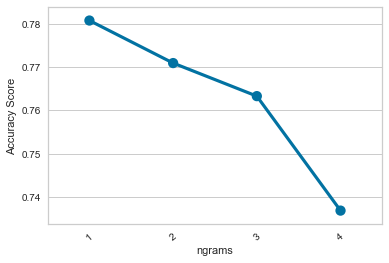

Τα αποτελέσματα για τα διαφορετικά max df είναι
   params    scores
0    0.25  0.774306
1    0.50  0.780269
2    0.75  0.780768
3    1.00  0.780768


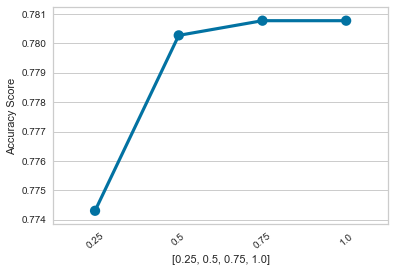

Τα αποτελέσματα για τα διαφορετικά max features είναι
   params    scores
0    None  0.780768
1    5000  0.791305
2   20000  0.782437
3   50000  0.781310
4  100000  0.780768


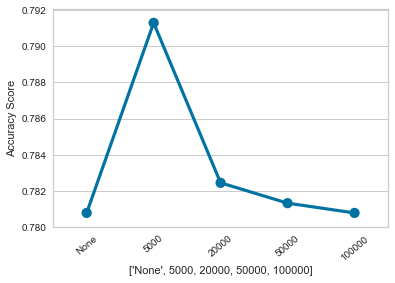

In [13]:
#Δημιουργούμε Dataframes με τα διαφοερτικα αποτελέσματα μας και τα εκτυπώνουμε
ngrams=[1,2,3,4]
ngram_params = ['tvec gram_1','tvec gram_2','tvec gram_3','tvec gram_4']
ngram_df = pd.DataFrame({'params':ngrams, 'scores':ngram_scores}, index=[0,1,2,3])
print("Τα αποτελέσματα για τα διαφορετικά ngrams είναι")
print(ngram_df)
# adding cvec score with default params
#ngram_df = ngram_df.append(acc_df.iloc[:1,:])
# plot scores on graph
sns.pointplot(x='params', y='scores', data =ngram_df)
plt.ylabel('Accuracy Score')
plt.xlabel('ngrams')
plt.xticks(rotation=40)
plt.show()

mdf_params = [0.25, 0.5, 0.75, 1.0]
maxdf_df = pd.DataFrame({'params':mdf_params, 'scores':mdf_scores}, index=[0,1,2,3])
# adding cvec score with default params
print("Τα αποτελέσματα για τα διαφορετικά max df είναι")
print(maxdf_df)
# plot scores on graph
sns.pointplot(x='params', y='scores', data =maxdf_df)
plt.ylabel('Accuracy Score')
plt.xlabel(mdf_params)
plt.xticks(rotation=40)
plt.show()

maxfeat=['None',5000,20000,50000,100000]
maxfeat_df = pd.DataFrame({'params':maxfeat, 'scores':maxfeat_scores}, index=[0,1,2,3,4])
# adding cvec score with default params
print("Τα αποτελέσματα για τα διαφορετικά max features είναι")
print(maxfeat_df)
#ngram_df = ngram_df.append(acc_df.iloc[:1,:])
# plot scores on graph
sns.pointplot(x='params', y='scores', data =maxfeat_df)
plt.ylabel('Accuracy Score')
plt.xlabel(maxfeat)
plt.xticks(rotation=40)
plt.show()


In [14]:
#Επιλογή καλύτερων features για τον vectorizer
best_maxfeat=max(maxfeat_scores)#Βλέπουμε ότι το καλύτερο score είναι με maxfeat=5000
best_ngram=max(ngram_scores)
best_mdf=max(mdf_scores)
print("Το καλύτερο σκορ που πετύχαμε με την παραμετροποίηση ήταν το {}".format(max(best_maxfeat,best_ngram,best_mdf)))


Το καλύτερο σκορ που πετύχαμε με την παραμετροποίηση ήταν το 0.7913053574481015


In [15]:
#δοκιμαζουμε με τον καλυτερο vectorizer διαφορετικους classifiers
# initalise the vectoriser 
cvec = CountVectorizer(tokenizer=tokenizer_preproccessor_imdb,max_features=5000)
# fit the training data on the model
#transform training data into sparse matrix
X_train_cvec=cvec.fit_transform(X_train_v)


X_test_cvec=cvec.transform(X_test_v)
#print(X_train_tvec)

In [16]:
#δοκιμαζουμε διαφορετικούς classifiers
classifier_finder(X_train_cvec,X_test_cvec,y_train_v,y_test_v)

C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Η επιτυχία του  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False) είναι:  0.8442756708489361
Η επιτυχία του  MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) είναι:  0.792866876064978
Η επιτυχία του  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') είναι:  0.7170427531106962


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Η επιτυχία του  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) είναι:  0.7657848882287805


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iter

Η επιτυχία του  LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=2000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0) είναι:  0.8341934695884105
                    params    scores
0     Logistisc Regression  0.844276
1  Multinomial Naive Bayes  0.792867
2            Decision Tree  0.717043
3            Random Forest  0.765785
4               Linear SVC  0.834193


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [17]:
# Grid search cross validation¶
grid={"C":np.logspace(-1,1,3), "penalty":["l1","l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10,verbose=5)
logreg_cv.fit(X_train_cvec,y_train_v)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV] C=0.1, penalty=l1 ...............................................
[CV] ...... C=0.1, penalty=l1, score=0.8655972252330371, total=   0.8s
[CV] C=0.1, penalty=l1 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] ...... C=0.1, penalty=l1, score=0.8564925211359202, total=   0.8s
[CV] C=0.1, penalty=l1 ...............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV] ....... C=0.1, penalty=l1, score=0.858226750487752, total=   0.9s
[CV] C=0.1, penalty=l1 ...............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.8s remaining:    0.0s


[CV] ...... C=0.1, penalty=l1, score=0.8625325238508239, total=   0.9s
[CV] C=0.1, penalty=l1 ...............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.8s remaining:    0.0s


[CV] ....... C=0.1, penalty=l1, score=0.877059843885516, total=   0.9s
[CV] C=0.1, penalty=l1 ...............................................
[CV] ....... C=0.1, penalty=l1, score=0.854726799653079, total=   0.8s
[CV] C=0.1, penalty=l1 ...............................................
[CV] ...... C=0.1, penalty=l1, score=0.8636166522116219, total=   0.8s
[CV] C=0.1, penalty=l1 ...............................................
[CV] ...... C=0.1, penalty=l1, score=0.8570808935155064, total=   0.8s
[CV] C=0.1, penalty=l1 ...............................................
[CV] ...... C=0.1, penalty=l1, score=0.8616352201257862, total=   0.7s
[CV] C=0.1, penalty=l1 ...............................................
[CV] ...... C=0.1, penalty=l1, score=0.8488397310778573, total=   0.7s
[CV] C=0.1, penalty=l2 ...............................................
[CV] ...... C=0.1, penalty=l2, score=0.8642965532191632, total=   6.5s
[CV] C=0.1, penalty=l2 ...............................................
[CV] .

C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ...... C=1.0, penalty=l2, score=0.8543247344461306, total=  19.6s
[CV] C=1.0, penalty=l2 ...............................................
[CV] ...... C=1.0, penalty=l2, score=0.8328636462172122, total=  25.9s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ....... C=1.0, penalty=l2, score=0.841968350314329, total=  18.8s
[CV] C=1.0, penalty=l2 ...............................................
[CV] ...... C=1.0, penalty=l2, score=0.8475715524718127, total=  20.3s
[CV] C=1.0, penalty=l2 ...............................................
[CV] ...... C=1.0, penalty=l2, score=0.8516912402428447, total=  22.4s
[CV] C=1.0, penalty=l2 ...............................................
[CV] ...... C=1.0, penalty=l2, score=0.8421509106678231, total=  15.4s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ....... C=1.0, penalty=l2, score=0.856244579358196, total=  18.8s
[CV] C=1.0, penalty=l2 ...............................................
[CV] ...... C=1.0, penalty=l2, score=0.8397310778572977, total=  17.8s
[CV] C=1.0, penalty=l2 ...............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ...... C=1.0, penalty=l2, score=0.8516590761223162, total=  16.8s
[CV] C=1.0, penalty=l2 ...............................................
[CV] ...... C=1.0, penalty=l2, score=0.8349598785512904, total=  16.9s
[CV] C=10.0, penalty=l1 ..............................................
[CV] ..... C=10.0, penalty=l1, score=0.8467374810318664, total=   2.8s
[CV] C=10.0, penalty=l1 ..............................................
[CV] ..... C=10.0, penalty=l1, score=0.8248428354649903, total=   1.2s
[CV] C=10.0, penalty=l1 ..............................................
[CV] ..... C=10.0, penalty=l1, score=0.8358985475829178, total=   1.1s
[CV] C=10.0, penalty=l1 ..............................................
[CV] ..... C=10.0, penalty=l1, score=0.8404163052905465, total=   1.5s
[CV] C=10.0, penalty=l1 ..............................................
[CV] ..... C=10.0, penalty=l1, score=0.8471379011274935, total=   1.4s
[CV] C=10.0, penalty=l1 ..............................................
[CV] .

C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=10.0, penalty=l2, score=0.8525905050942987, total=  19.0s
[CV] C=10.0, penalty=l2 ..............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ...... C=10.0, penalty=l2, score=0.834381096900065, total=  17.7s
[CV] C=10.0, penalty=l2 ..............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ...... C=10.0, penalty=l2, score=0.842185128983308, total=  17.3s
[CV] C=10.0, penalty=l2 ..............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=10.0, penalty=l2, score=0.8451864700780573, total=  18.8s
[CV] C=10.0, penalty=l2 ..............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=10.0, penalty=l2, score=0.8490893321769297, total=  21.0s
[CV] C=10.0, penalty=l2 ..............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=10.0, penalty=l2, score=0.8434518647007806, total=  16.2s
[CV] C=10.0, penalty=l2 ..............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=10.0, penalty=l2, score=0.8542931483087598, total=  17.5s
[CV] C=10.0, penalty=l2 ..............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=10.0, penalty=l2, score=0.8336586423769248, total=  29.9s
[CV] C=10.0, penalty=l2 ..............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=10.0, penalty=l2, score=0.8497072218607677, total=  15.9s
[CV] C=10.0, penalty=l2 ..............................................


C:\Users\dtchmnt\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  8.3min finished


[CV] ..... C=10.0, penalty=l2, score=0.8282368249837345, total=  24.7s
tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l1'}
accuracy : 0.8605810928013877


In [18]:
#best_clf_vader = LogisticRegression(**logreg_cv.best_params_)
best_clf_vader=LogisticRegression(C=0.1,penalty='l1')
best_clf_vader.fit(X_train_cvec,y_train_v)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### σωζουμε τα test sets, τον best_clf_vader και τον vectorizer
saveList(X_test_v,"X_test_vader")
saveList(y_test_v,"y_test_vader")
saveList(X_test_cvec,"X_test_vader_dtm")
joblib.dump(best_clf_vader, 'vader_clf.pkl')
joblib.dump(cvec, 'vader_cvec.pkl')